In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

# 1.Load data set and primary information

In [2]:
df = pd.read_excel("E:\Filecuakio\FALL23\ADY\Lab6\data_flight.xlsx")

In [3]:
df.shape

(129880, 24)

In [4]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace=True)

In [9]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.160102
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.599601
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# II.Visualization

1. Distribution by age

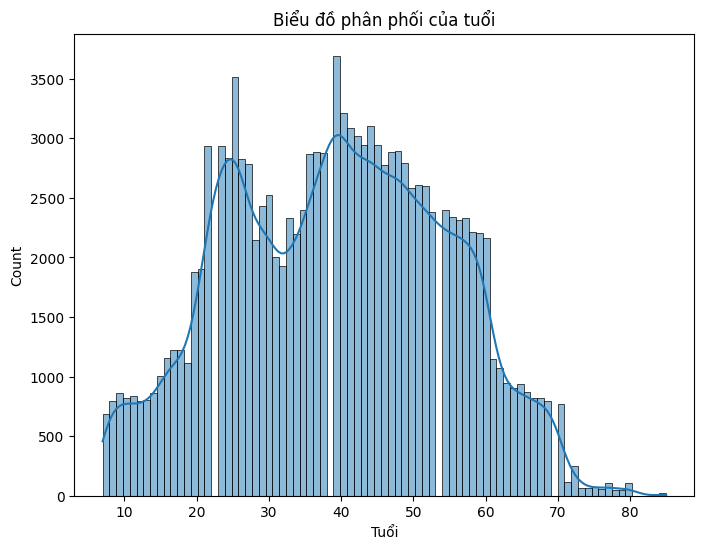

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.xlabel('Tuổi')
plt.title('Biểu đồ phân phối của tuổi')
plt.show()

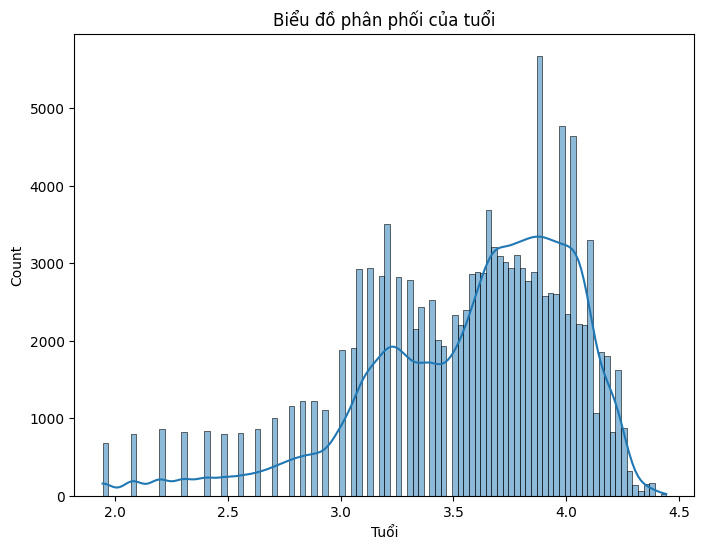

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(np.log(df['Age']), kde=True)
plt.xlabel('Tuổi')
plt.title('Biểu đồ phân phối của tuổi')
plt.show()

2. Distribution of seat comfort by flight distance

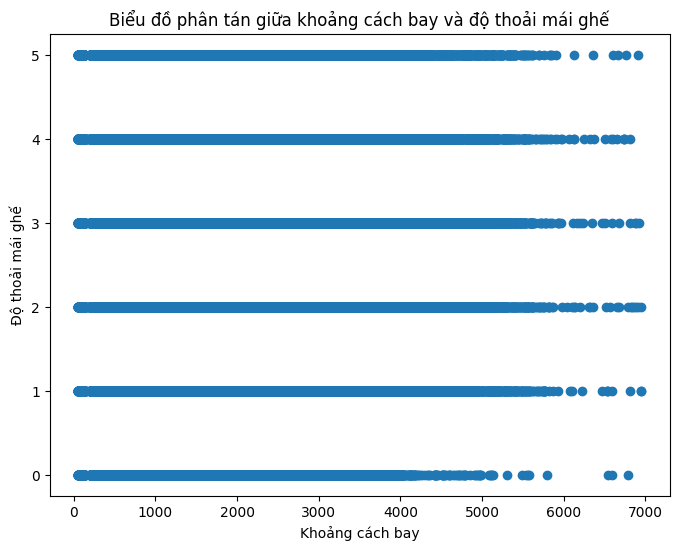

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Flight Distance'], df['Seat comfort'])
plt.xlabel('Khoảng cách bay')
plt.ylabel('Độ thoải mái ghế')
plt.title('Biểu đồ phân tán giữa khoảng cách bay và độ thoải mái ghế')
plt.show()

3. Distribution of loyal customer

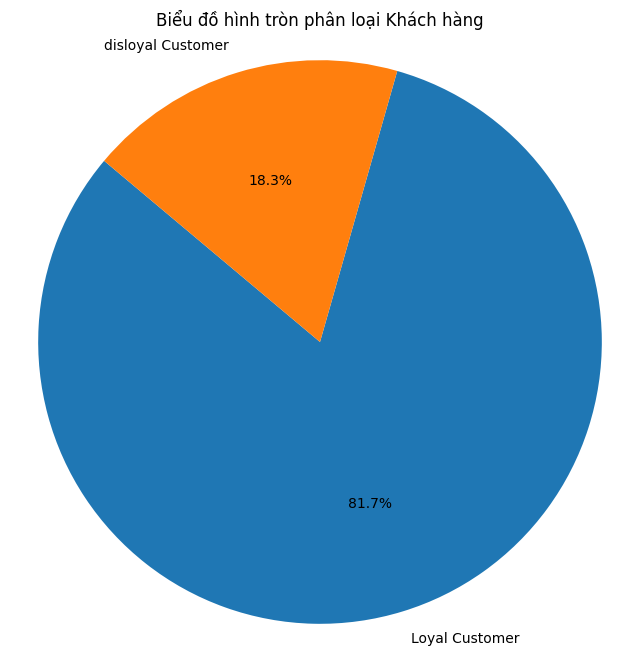

In [12]:
plt.figure(figsize=(8, 8))
customer_type_counts = df['Customer Type'].value_counts()
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Để biểu đồ tròn
plt.title('Biểu đồ hình tròn phân loại Khách hàng')
plt.show()

4. Distribution of satisfied and disatisfied customer by some categorical value

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


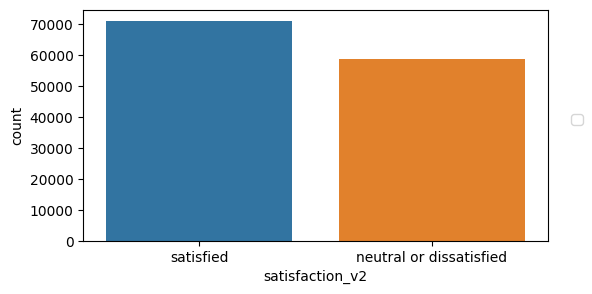

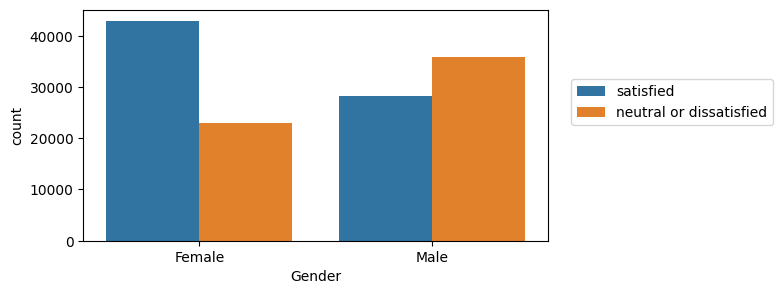

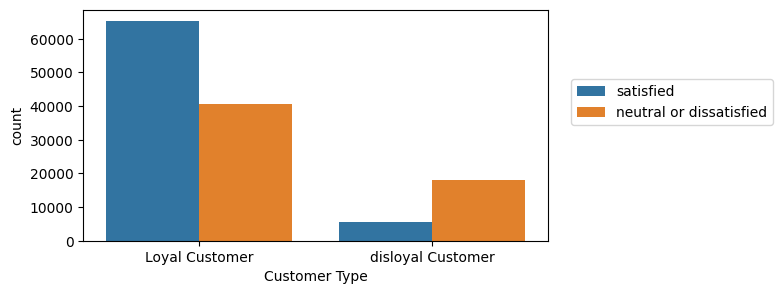

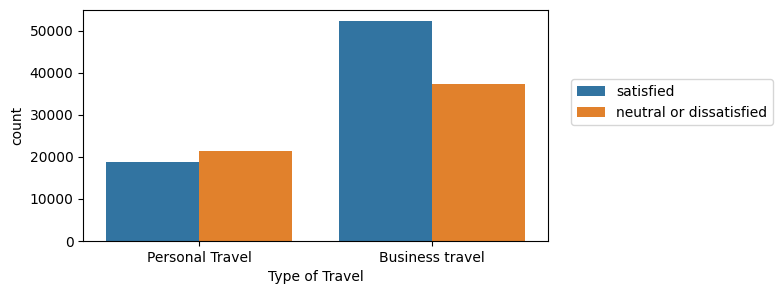

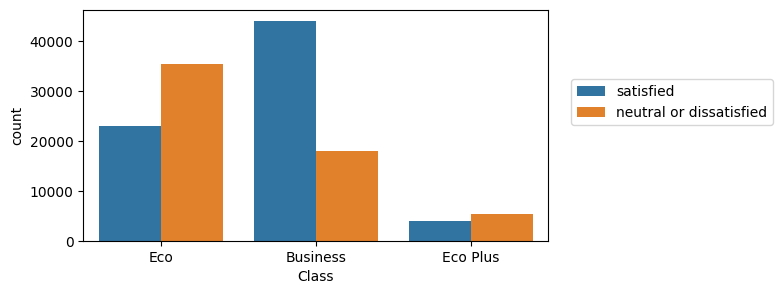

In [13]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
for col in cat_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction_v2')
    plt.legend(loc=(1.05,0.5))
    plt.show()

5. Box plot so spot out outliers of some numerical value

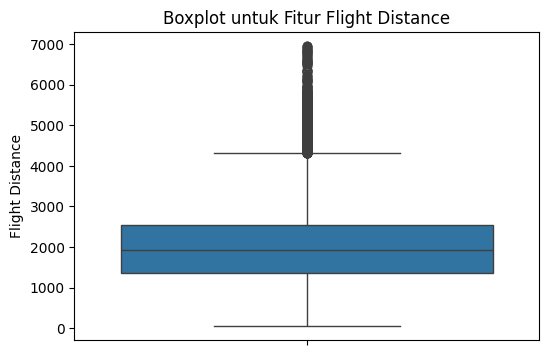

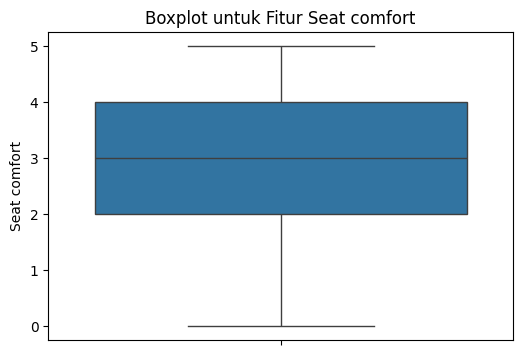

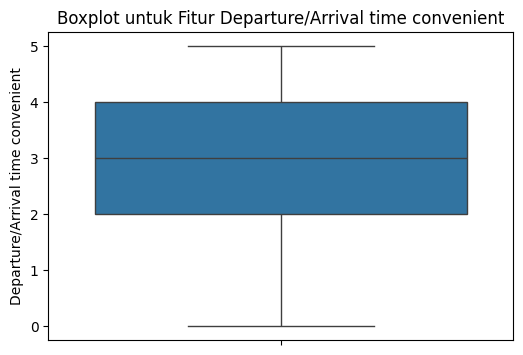

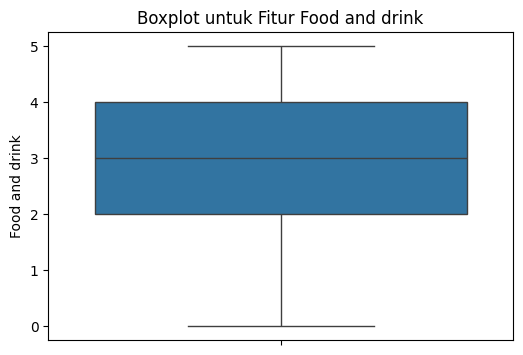

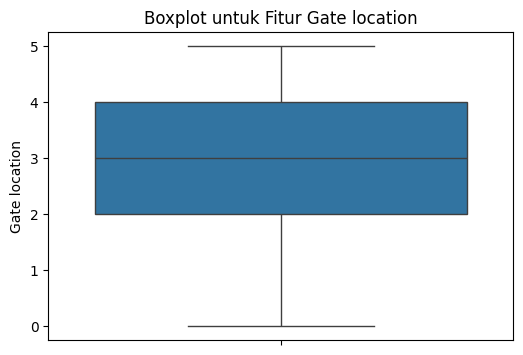

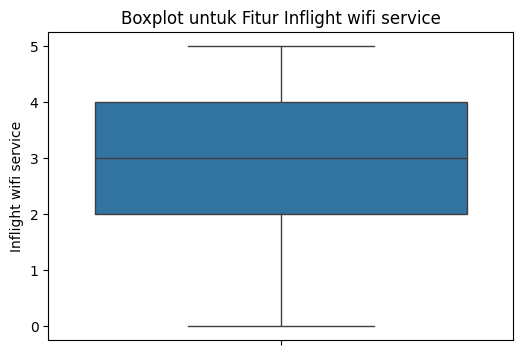

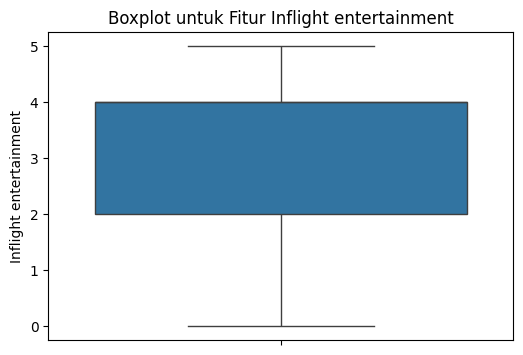

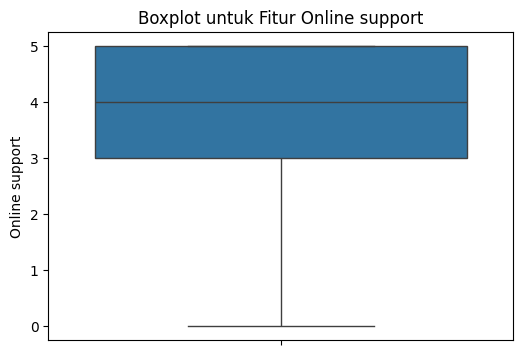

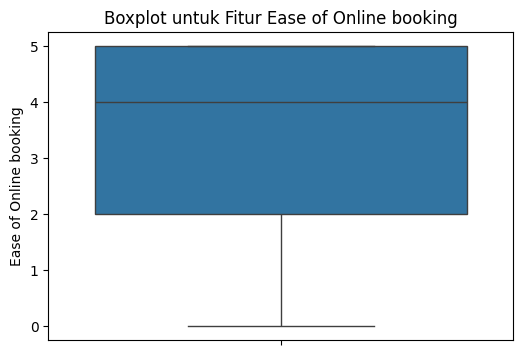

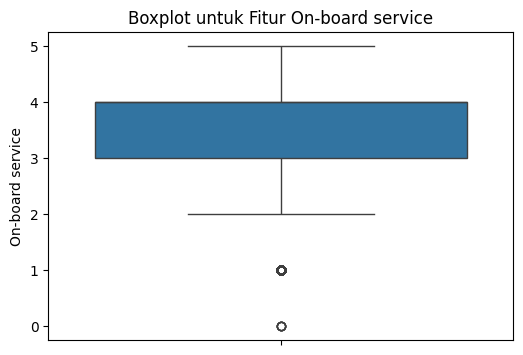

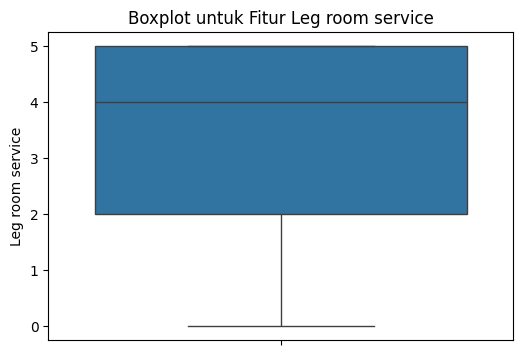

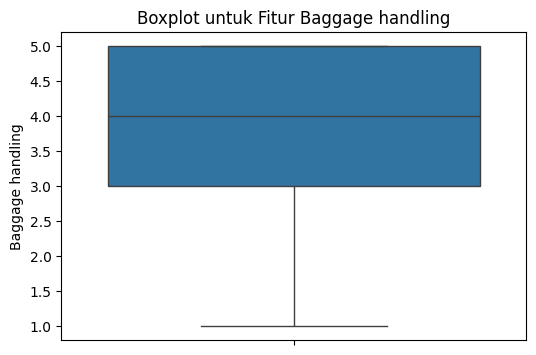

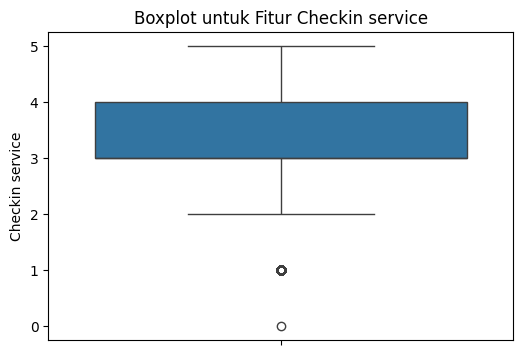

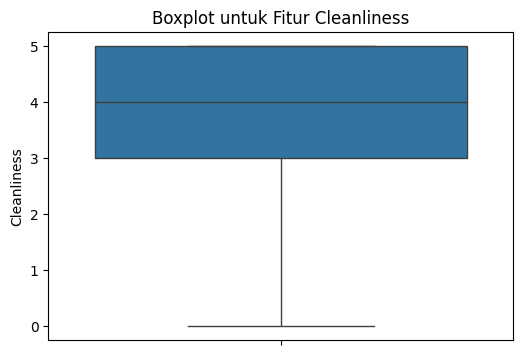

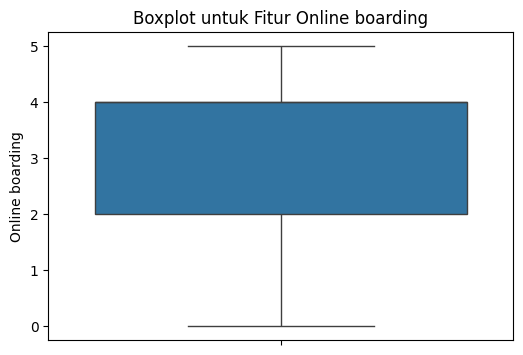

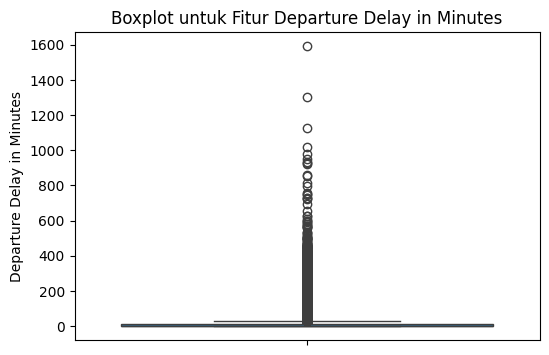

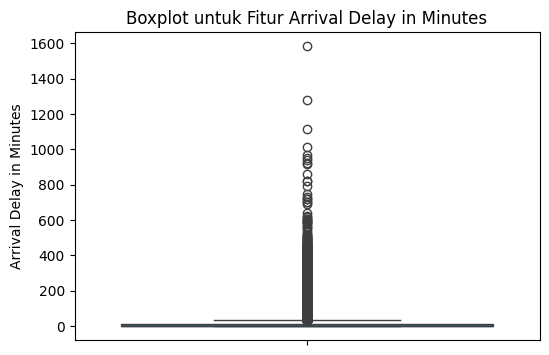

In [14]:
#list of columns to be checked
fitur = ['Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']
#loop through the selected columns
for col in fitur:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot untuk Fitur {col}')
    plt.ylabel(col)
    plt.show()

Conclusion:Flight distance and delay time have the most outlier values but in fact they are reasonable so we don't need to remove those.

# III. Transform data for Decision Tree model

In [15]:
df['satisfaction_v2'].value_counts()

satisfaction_v2
satisfied                  71087
neutral or dissatisfied    58793
Name: count, dtype: int64

In [16]:
df['Class'].value_counts()

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

In [17]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [18]:
df['Customer Type'].value_counts()
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [19]:
df['satisfaction_v2'] = df['satisfaction_v2'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df['Class'] = df['Class'].map({'Eco':0, 'Eco Plus':1, 'Business':2})
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df.drop(columns=['Gender'])
df



,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,1,1,65,0,0,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,0,1,47,0,2,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,1,1,15,0,0,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,1,1,60,0,0,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,1,1,70,0,0,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,1,1,0,29,0,0,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,0,0,0,63,0,2,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,0,0,0,69,0,0,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,0,0,0,66,0,0,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


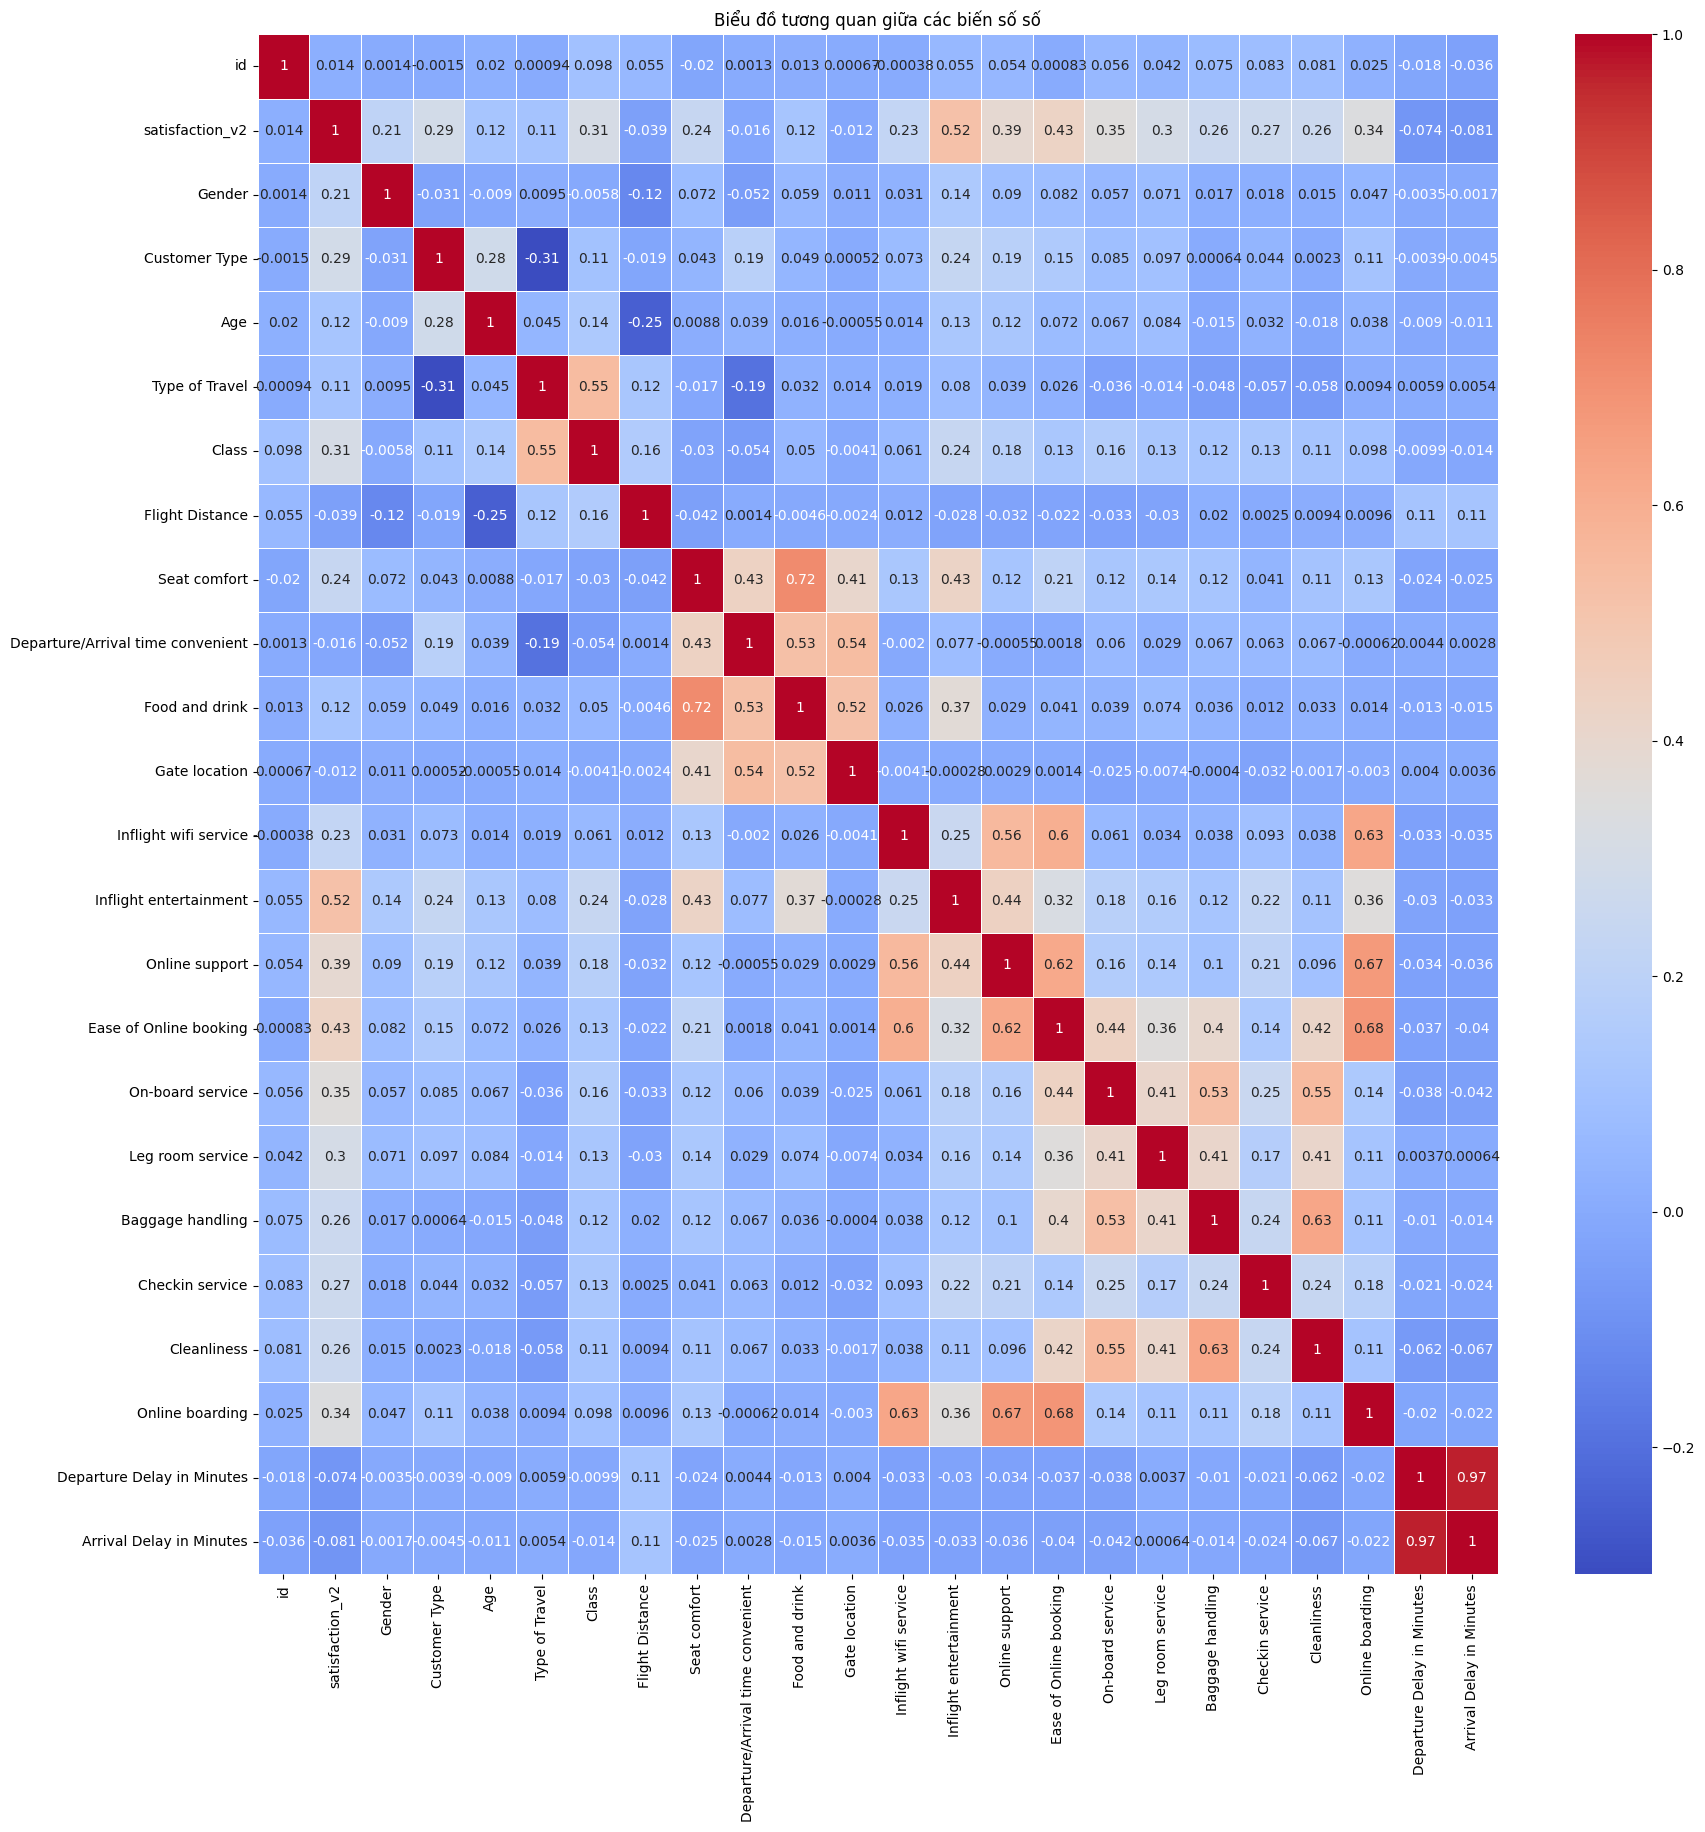

In [20]:

correlation_matrix = df.corr()

# Vẽ biểu đồ tương quan (correlation heatmap)
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Biểu đồ tương quan giữa các biến số số')
plt.show()

The table shows that the satisfaction depends the most on tw categories: inflight entertainment and ease of online booking.

In [21]:
df['Ease of Online booking'].value_counts()


Ease of Online booking
4    39920
5    34137
3    22418
2    19951
1    13436
0       18
Name: count, dtype: int64

In [22]:
df['Inflight entertainment'].value_counts()

Inflight entertainment
4    41879
5    29831
3    24200
2    19183
1    11809
0     2978
Name: count, dtype: int64

In [23]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Chọn các cột cần sử dụng
X = df.drop(columns=['id', 'satisfaction_v2'])
y = df['satisfaction_v2']

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình
dt.fit(X_train, y_train)

# Dự đoán
y_pred = dt.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.942754850631352
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11675
           1       0.95      0.95      0.95     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,y_pred)

0.7686550902311828